# 6 集成学习 

集成学习将多个模型融合, 取长补短变得更好. 常用的方法有 boosting.

## Adaboost




Adaboost 用同一模型在不同权重的数据上拟合, 最终将这些不同权重数据上学习得到的模型融合.

假设对于**分类问题**有数据 $(x_i,y_i)\quad (i=1,2,\dotsc,n)$, 其中 $y_i\in\left\{-1,1\right\}$.

步骤: 

1. 给每条数据初始化权重 $w_{1,1}=w_{1,2}=\dotsc=w_{1,n}=\dfrac 1n$.

2. 令 $m=1$ 表示第一轮, 训练模型 $G_1$, 且利用的是带权重的损失函数
$$\mathcal L_m = \sum_{i=1}^n w_{m,i} \mathbb I_{G_m(x_i) \neq y_i}.$$

3. 计算这些模型的带权重的错误率 (即损失函数) 以及系数 $\alpha$
$$e_m = \mathcal L_m =   \sum_{i=1}^n w_{m,i} \mathbb I_{G_m(x_i)\neq y_i}\quad\quad\quad 
\alpha_m = \frac 12\log\frac{1 - e_m}{e_m}.$$

4. 更新第 $(m+1)$ 轮的权重 $w_{m+1,i}$
$$w_{m+1,i}=\frac{\exp\left\{-\alpha_m y_i G_m(x_i)\right\}}{\sum_{j=1}^n w_{m,j}\exp\left\{-\alpha_m y_j G_m(x_j)\right\}}w_{m,i}$$

5. 令 $m=2,3,\dotsc,M$, 重复步骤 2,3,4 得到 $(G_2,e_2,\alpha_2),\dotsc,(G_M,e_M,\alpha_M)$. 最终的融合分类器结果为
$$\overline{G_M} = \sum_{m=1}^M \alpha_m G_m$$

### 前向分步算法

假设 $b(x;\theta)$ 是含参模型, $\theta$ 是参数. 定义可加模型为这些模型 (函数) 乘上一些系数的和:
$$f(x) = \sum_{m=1}^M \alpha_m b(x;\theta_m)$$

问题为求解最优的系数 $\theta_i\ (i=1,\dotsc,M)$ 与权重 $\alpha_i\ (i=1,\dotsc,M)$ 使损失函数最小:
$${\rm argmin}_{\alpha,\theta} \sum_{j=1}^n\mathcal L\left(y_j,f(x_j)\right)$$

<br>

用近似的贪心算法求解以上问题, 即从 $m=0$ 开始, 每次找到一组新的 $(\gamma_m,\theta_m)$ 使损失函数最小 $(m=1,\dotsc,M)$.

$$\left\{\begin{aligned}(\alpha_m,\theta_m) &= {\rm argmin}_{\alpha,\theta}  \sum_{j=1}^n\mathcal L\left(y_j,f_{m-1}(x_j)+\alpha b(x_j;\theta)\right)\\  f_m(x) &= f_{m-1}(x) +\alpha_m b(x;\theta_m) \end{aligned}\right.$$


<br>

**定理** 若 $\alpha>0$, $b(x;\theta)\in\{-1,1\}$, 且取指数分类损失函数 $L(y,f(x)) = e^{-yf(x)}\ (y\in\{-1,1\})$, 则 Adaboost 与 前向分步算法的更新方式等价.

**证明** 考察 $(\alpha_m,\beta_m)$ 的优化目标:
$$\begin{aligned}\mathcal L &=\sum_{j=1}^n\mathcal L\left(y_j,f_{m-1}(x_j)+\alpha b(x_j;\theta)\right)=
\sum_{j=1}^n\exp\left\{-y_j\left(f_{m-1}(x_j)+\alpha b(x_j;\theta)\right)\right\}\\
&= \sum_{j=1}^n\exp\left\{-y_j f_{m-1}(x_j) \right\}\exp\left\{-\alpha \mathbb I_{y_j= b(x_j;\theta)}\right\}\\
&= \sum_{j=1}^n\exp\left\{-y_j f_{m-1}(x_j) \right\}e^{-\alpha}+(e^\alpha - e^{-\alpha})\sum_{j=1}^n\exp\left\{-y_j f_{m-1}(x_j) \right\}\mathbb I_{y_j\neq b(x_j;\theta)}
\end{aligned}
$$

固定 $\alpha$ 时, 上式的第一项是常数, 因此, $\theta$ 需使得 $\sum_{j=1}^n\exp\left\{-y_j f_{m-1}(x_j) \right\}\mathbb I_{y_j\neq b(x_j;\theta)}$ 最小.

再关于 $\alpha$ 求极值: 
$$\mathcal L =
e^{\alpha}\sum_{j=1}^n\exp\left\{-y_j f_{m-1}(x_j) \right\}\mathbb I_{y_j\neq b(x_j;\theta)}+
e^{-\alpha}\sum_{j=1}^n\exp\left\{-y_j f_{m-1}(x_j) \right\}\mathbb I_{y_j= b(x_j;\theta)}
$$
是关于 $e^\alpha$ 的对勾函数, 因此最优的 $\alpha$ 为
$$\alpha_m = \frac 12\log\frac{\sum_{j=1}^n\exp\left\{-y_j f_{m-1}(x_j) \right\}\mathbb I_{y_j= b(x_j;\theta)}}{\sum_{j=1}^n\exp\left\{-y_j f_{m-1}(x_j) \right\}\mathbb I_{y_j\neq b(x_j;\theta)}}$$

令 $w_j = \exp\left\{-y_j f_{m-1}(x_j) \right\}$, 以及以 $w$ 为权重的损失函数 $\mathcal L = \sum_{j=1}^nw_j\mathbb I_{y_j\neq b(x_j;\theta)}$, 则 
$$\left\{\begin{aligned}\theta_m& = {\rm argmin}_\theta \sum_{j=1}^nw_j\mathbb I_{y_j\neq b(x_j;\theta)}={\rm argmin}_\theta\mathcal L\\
\alpha_m  &= \frac 12 \log\frac{1- \mathcal L}{\mathcal L}  
\end{aligned}\right.
$$

且 $w_j$ 更新成下一轮的值为:
$$w_j'= \exp\left\{-y_j f_{m}(x_j) \right\}=\exp\left\{-y_j (f_{m-1}(x_j)+\alpha_mb(x;\theta_m)) \right\} =w_j\exp\left\{-y_j\alpha_mb(x;\theta_m) \right\}$$

注: 虽然 Adaboost 中 $w_j'$ 还要全体除以一个系数, 但是容易发现 $w$ 是齐次的, 所有权重一起乘或除以相同系数不影响结果.

### 误差上界

Adaboost 中, 令 $e_m$ 为第 $m$ 步时的带权重的误差 (损失函数), $\gamma_m = \frac 12 - e_m$. 设 $Z_m = \sum_{i=1}^n w_{m,i}\exp\{-\alpha_m y_iG_m(x_i)\}$.

**定理** 
$$\frac 1n\sum_{i=1}^n \mathbb I_{{\rm sgn}(\overline{G_M}(x_i))\neq{\rm sgn}(y)}\leqslant \prod_{m=1}^M Z_m \leqslant\exp(-2\sum_{m=1}^M\gamma_m^2)$$

左侧不等号表明每次取 $G_m$ 使得 $Z_m$ 尽量小 (且小于 1) 可降低融合模型的错误率. 


**证明** 

1. 左侧不等号: 注意在 Adaboost 中, $Z_m = \frac{w_{m,i}}{w_{m+1,i}}e^{-\alpha_my_iG_m(x_i)}$, 因此
$$\prod_{m=1}^M Z_m =  \prod_{m=1}^M \frac{w_{m,i}}{w_{m+1,i}}e^{-\alpha_my_iG_m(x_i)}=   \frac{w_{1,i}}{w_{M+1,i}}\prod_{m=1}^Me^{-\alpha_my_iG_m(x_i)}=   \frac{w_{1,i}e^{-y_i\overline{G_M}(x_i)}}{w_{M+1,i}}\quad \forall i$$

根据和比定理, 以及 $w_{1,i} = \frac 1n$ 和 $\sum_{i=1}^nw_{M+1,i} = 1$,
$$\prod_{m=1}^M Z_m = \frac{\sum_{i=1}^n w_{1,i}e^{-y_i\overline{G_M}(x_i)}}{\sum_{i=1}^nw_{M+1,i}}
=\frac 1n \sum_{i=1}^n e^{-y_i\overline{G_M}(x_i)}\geqslant \frac 1n \sum_{i=1}^n e^{-y_i\overline{G_M}(x_i)} \mathbb I_{{\rm sgn}(\overline{G_M}(x_i))\neq{\rm sgn}(y)}\geqslant \frac 1n\sum_{i=1}^n \mathbb I_{{\rm sgn}(\overline{G_M}(x_i))\neq{\rm sgn}(y)}
$$

2. 右侧不等号:

$$Z_m = e^\alpha_m \sum_{i=1}^n w_{m,i}\mathbb I_{G_m(x_i)\neq y_i}+e^{-\alpha_m}\sum_{i=1}^n w_{m,i}\mathbb I_{G_m(x_i)=y_i}
=e^{\alpha_m} e_m + e^{-\alpha_m}(1-e_m) $$
由于 $\alpha_m = \frac 12\log \frac{1-e_m}{e_m}$ (其实就是使上面对勾函数最小的 $\alpha$), 故
$$Z_m= \sqrt{\frac{1-e_m}{e_m}}e_m + \sqrt{\frac{e_m}{1-e_m}}(1-e_m)=2\sqrt{e_m(1-e_m)}\leqslant e^{-2(\frac 12 -e_m)^2}$$

最后一步是因为
$$\ln(2\sqrt{x(1-x)}) = \frac12\ln(1-(1-2x)^2)\leqslant- \frac 12 (1-2x)^2=-2\left(\frac 12 - x\right)^2$$

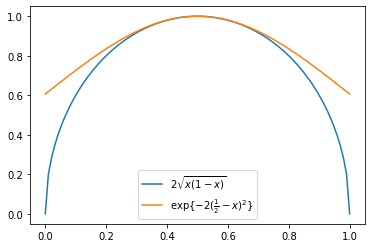

In [2]:
from matplotlib import pyplot as plt
import numpy as np
x = np.linspace(0, 1, 100)
y1 = np.sqrt(x * (1 - x)) * 2
y2 = np.exp(-2 * (.5 - x)**2)
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(['$2\\sqrt{x(1-x)}$','$\\exp\\{-2(\\frac{1}{2}-x)^2\\}$'])
plt.show()

## 提升树

提升树 (boosting tree) 专门用来提升决策树的性能. 提升树是多个决策树相加:
$$f_m(x) = \sum_{k=1}^m T_k(x)$$

每一步增加一点新的决策树使得损失函数最小即可:
$$f_{m+1} = f_m + T_{m+1}\quad {\rm s.t.}\ T_{m+1} = {\rm argmin}_T\mathcal L(f_m + T)$$

### 梯度提升

对于 **回归树** 可以利用梯度下降代替求解全局的 ${\rm argmin}$. 在每一步对于每一个样本 $i$ $(i=1,\dotsc,n)$先计算负梯度
$$r_i = -\left.\frac{\partial L(y,f(x_i))}{\partial f}\right|_f$$

然后对于 $r_ii,\ (i=1,\dotsc,n)$ 拟合回归树 $dT$. 假设 $dT$ 的所有叶节点 (leaf nodes) 为 $R_1,\dotsc,R_J$. 则每一个叶节点的学习率 (梯度下降的步长) 通过局部极小值求解:
$$\lambda_j = {\rm argmin}_\lambda \sum_{x_i\in R_j}\mathcal L(y_i, f(x_i)+\lambda)$$

最后更新
$$f\leftarrow f + \sum_{j=1}^J \lambda_j \mathbb I_{x\in R_j}$$

## 其他方法

### Bagging

从数据集中, 每次选取可重复的若干条数据并训练一个模型. 重复多次得到多个不同的模型, 可以求平均 (或对于分类问题可以取众数).

### 随机森林

随机森林 (random forest) 是很多个决策树 (decision tree). 在训练每一个决策树的过程中, 在树节点的每一步分裂时随机选择一部分特征作为考虑的变量. 这样引入随机性可以使得每个决策树各不相同.